# Import libraries

In [1]:
import perceptron
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import importlib
from matplotlib.colors import ListedColormap

# Get Iris data

In [2]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:', s)
df = pd.read_csv(s,
                    header=None,
                    encoding='utf-8')

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


## Plot data

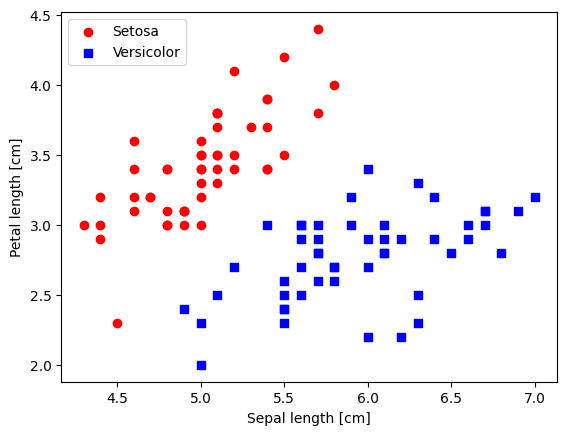

In [3]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

X = df.iloc[0:100, [0, 1]].values

plt.scatter(X[y==0, 0], X[y==0, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[y==1, 0], X[y==1, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.show()

## Fit model

In [4]:
importlib.reload(perceptron)

ppn = perceptron.Perceptron(eta=0.01, n_iter=1000)

ppn.fit(X, y)

ppn.info()

w: [ 0.78924345 -1.00311756 -1.24528172]


## Plot predictions

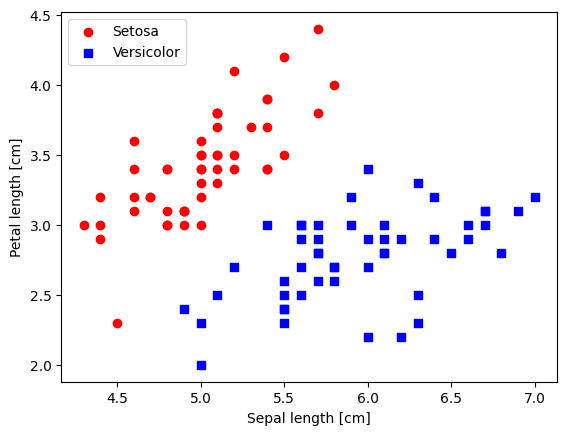

In [5]:
X1 = np.ones((X.shape[0], 1))
X_new = np.hstack((X, X1))

y_pred = ppn.predict(X_new)

plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.show()

## Plot decision boundaries

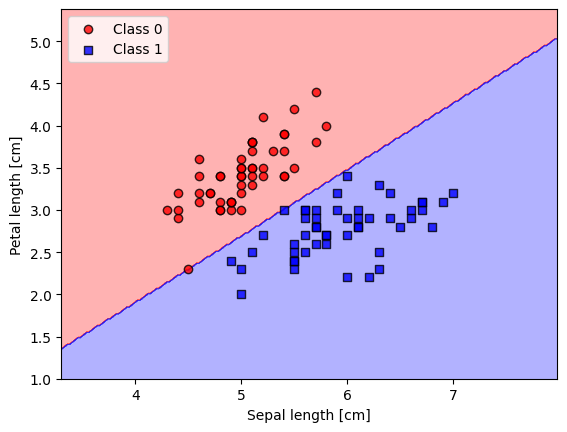

In [6]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel(), np.ones(xx1.ravel().shape)]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')




plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')